In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from pathlib import Path
import datetime
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import ttest_1samp

In [3]:
#Define file path and load the file
file_path = "Resources/games-features.csv"
file_data = pd.read_csv(file_path)

#Get the Columns needed for the analysis
games_data_df = pd.DataFrame(file_data[["ResponseName", "ReleaseDate", "DemoCount", "Metacritic", "RecommendationCount", "ScreenshotCount", "SteamSpyOwners", "SteamSpyPlayersEstimate", "ControllerSupport", "IsFree", "FreeVerAvail", "PurchaseAvail", "SubscriptionAvail", "PlatformWindows", "PlatformLinux", "PlatformMac", "GenreIsNonGame", "GenreIsIndie", "GenreIsAction", "GenreIsAdventure",
"GenreIsCasual", "GenreIsStrategy", "GenreIsRPG", "GenreIsSimulation", "GenreIsEarlyAccess", "GenreIsFreeToPlay", "GenreIsSports", "GenreIsRacing", "GenreIsMassivelyMultiplayer", "PriceInitial", "PriceFinal", "CategorySinglePlayer","CategoryMultiplayer"]])

games_data_df.head()

,ResponseName,ReleaseDate,DemoCount,Metacritic,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyPlayersEstimate,ControllerSupport,IsFree,...,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,PriceFinal,CategorySinglePlayer,CategoryMultiplayer
0,Counter-Strike,Nov 1 2000,0,88,68991,13,13033334,9140731,False,False,...,False,False,False,False,False,False,9.99,9.99,False,True
1,Team Fortress Classic,Apr 1 1999,0,0,2439,5,5399140,753627,False,False,...,False,False,False,False,False,False,4.99,4.99,False,True
2,Day of Defeat,May 1 2003,0,79,2319,5,7621102,1709740,False,False,...,False,False,False,False,False,False,4.99,4.99,False,True
3,Deathmatch Classic,Jun 1 2001,0,0,888,4,7498965,789676,False,False,...,False,False,False,False,False,False,4.99,4.99,False,True
4,Half-Life: Opposing Force,Nov 1 1999,0,0,2934,5,5399499,705741,False,False,...,False,False,False,False,False,False,4.99,4.99,True,True


In [4]:
#Remove the rows with garbage date values

games_data_df['ReleaseDate'] = pd.to_datetime(games_data_df['ReleaseDate'], errors='coerce')
games_data_df['ReleaseDate'].replace('', np.nan, inplace=True)

cleaned_data_df = games_data_df.dropna()

In [5]:
#Remove duplicate games
cleaned_data_df = cleaned_data_df.drop_duplicates(subset=['ResponseName'], keep='first')

In [6]:
cleaned_data_df = cleaned_data_df.rename(columns={"ResponseName": "GameName",
                                                  "Metacritic": "MetacriticRating"})

cleaned_data_df.to_csv("Resources/clean_data.csv")

cleaned_data_df.head()

,GameName,ReleaseDate,DemoCount,MetacriticRating,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyPlayersEstimate,ControllerSupport,IsFree,...,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,PriceFinal,CategorySinglePlayer,CategoryMultiplayer
0,Counter-Strike,2000-11-01,0,88,68991,13,13033334,9140731,False,False,...,False,False,False,False,False,False,9.99,9.99,False,True
1,Team Fortress Classic,1999-04-01,0,0,2439,5,5399140,753627,False,False,...,False,False,False,False,False,False,4.99,4.99,False,True
2,Day of Defeat,2003-05-01,0,79,2319,5,7621102,1709740,False,False,...,False,False,False,False,False,False,4.99,4.99,False,True
3,Deathmatch Classic,2001-06-01,0,0,888,4,7498965,789676,False,False,...,False,False,False,False,False,False,4.99,4.99,False,True
4,Half-Life: Opposing Force,1999-11-01,0,0,2934,5,5399499,705741,False,False,...,False,False,False,False,False,False,4.99,4.99,True,True


## Platforms and Marketing Analysis 

### (1) Which platform (Windows, Linux, Mac) has the highest player count on average?

Calculate the average player count for each platform and visualize the results using bar charts. The groupby function will help group the data by platform, and then calculate the mean player count for each group.

In [7]:
# Load cleaned dataset
file_path = "Resources/clean_data.csv"
cleaned_data_df = pd.read_csv(file_path)

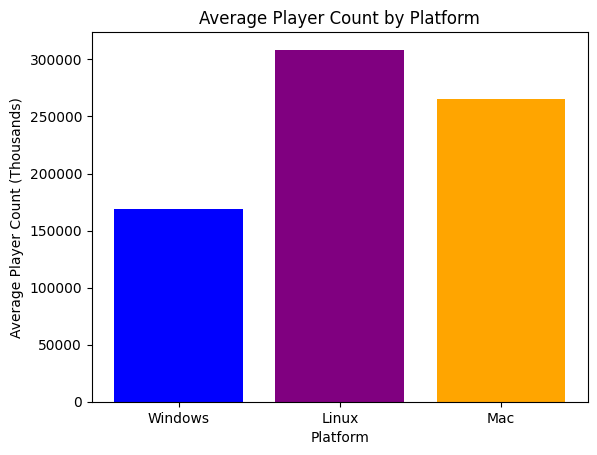

In [8]:
# Calculate the average player count for each platform
windows_player_counts = cleaned_data_df[cleaned_data_df['PlatformWindows'] == True]['SteamSpyOwners'].mean()
linux_player_counts = cleaned_data_df[cleaned_data_df['PlatformLinux'] == True]['SteamSpyOwners'].mean()
mac_player_counts = cleaned_data_df[cleaned_data_df['PlatformMac'] == True]['SteamSpyOwners'].mean()

# Create a bar chart to visualize the results
platforms = ['Windows', 'Linux', 'Mac']
average_player_counts = [windows_player_counts, linux_player_counts, mac_player_counts]
colors = ['blue', 'purple', 'orange']

plt.bar(platforms, average_player_counts, color=colors)
plt.title('Average Player Count by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Player Count (Thousands)')
plt.show()

### 1.1 Due to unexpected Linux results
To get a more comprehensive view, analyze the distribution of player counts for each platform, including metrics like median and standard deviation. To help understand not only the average player count but also the spread of player counts on each platform.

In [9]:
# Group the data by platform
platform_groups = cleaned_data_df.groupby(['PlatformWindows', 'PlatformMac', 'PlatformLinux'])

# Calculate summary statistics for player counts within each group, including mean, median, and std
summary_statistics = platform_groups['SteamSpyOwners'].agg(['mean', 'median', 'std'])

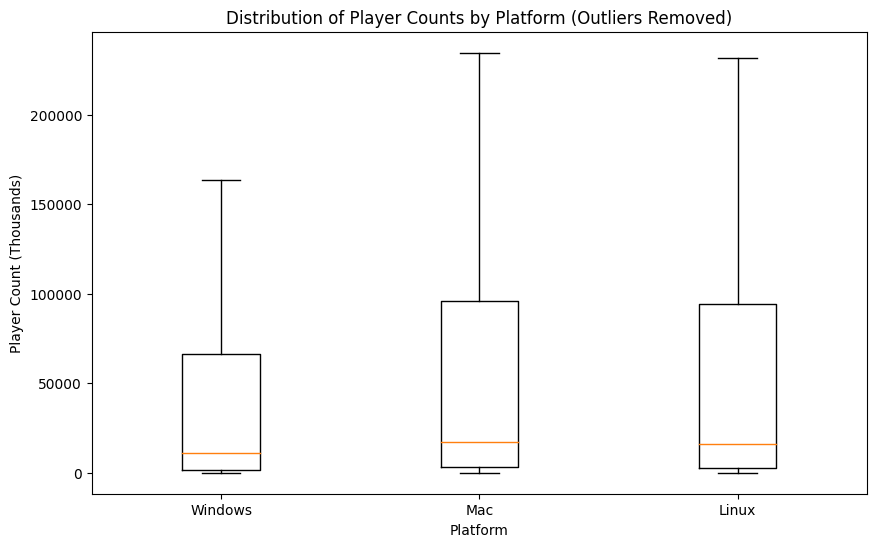

In [10]:
# Create a list to store the player counts for each platform
player_counts = [
    cleaned_data_df[cleaned_data_df['PlatformWindows']]['SteamSpyOwners'],
    cleaned_data_df[cleaned_data_df['PlatformMac']]['SteamSpyOwners'],
    cleaned_data_df[cleaned_data_df['PlatformLinux']]['SteamSpyOwners']
]

# Platform labels
platforms = ['Windows', 'Mac', 'Linux']

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(player_counts, labels=platforms, showfliers=False)
plt.title('Distribution of Player Counts by Platform (Outliers Removed)')
plt.xlabel('Platform')
plt.ylabel('Player Count (Thousands)')
plt.show()

### 1.2 Additionally
Explore whether there's a correlation between the number of games available on each platform and the mean player count. This could provide insights into how the availability of games affects player counts on different platforms. 

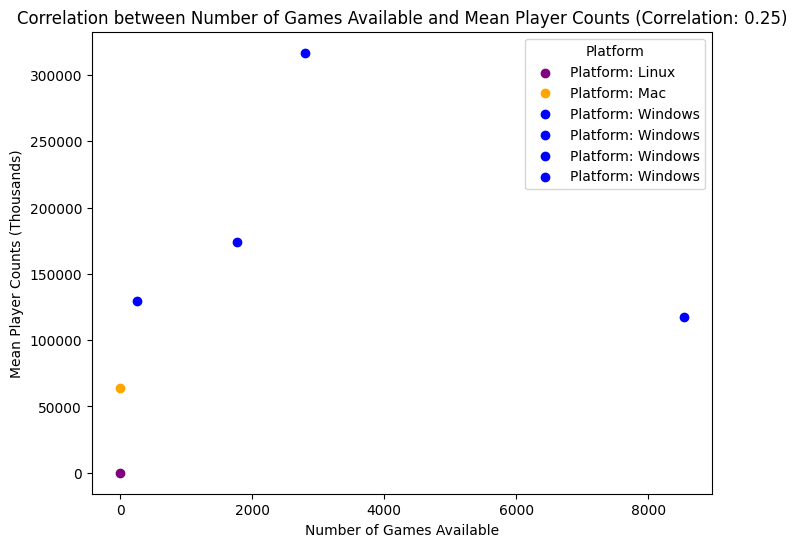

In [11]:
# Calculate the mean player count for each platform
mean_player_counts = games_data_df.groupby(['PlatformWindows', 'PlatformMac', 'PlatformLinux'])['SteamSpyOwners'].mean()

# Calculate the number of games available on each platform
num_games_available = games_data_df.groupby(['PlatformWindows', 'PlatformMac', 'PlatformLinux']).size()

# Create a DataFrame to store the results
correlation_df = pd.DataFrame({'MeanPlayerCounts': mean_player_counts, 'NumGamesAvailable': num_games_available})

# Calculate the correlation between the number of games available and mean player counts
correlation = correlation_df['MeanPlayerCounts'].corr(correlation_df['NumGamesAvailable'])

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(8, 6))

# Separate the data for each platform combination
for platform, data in correlation_df.groupby(level=[0, 1, 2]):
    if platform == (True, False, False):
        color = 'blue'
        platform_label = 'Windows'
    elif platform == (False, True, False):
        color = 'orange'
        platform_label = 'Mac'
    elif platform == (False, False, True):
        color = 'purple'
        platform_label = 'Linux'
    
    plt.scatter(data['NumGamesAvailable'], data['MeanPlayerCounts'], label=f'Platform: {platform_label}', c=color)

plt.title(f'Correlation between Number of Games Available and Mean Player Counts (Correlation: {correlation:.2f})')
plt.xlabel('Number of Games Available')
plt.ylabel('Mean Player Counts (Thousands)')
plt.legend(title='Platform')
plt.show()

# Analysis 

- In summary, the revised analysis suggests that, on average, there is no substantial difference in player counts between Windows, Mac, and Linux platforms in the dataset due to limited data availability on players counts per platform. 
- Any initial differences observed may have been influenced by outliers in game counts or limited data availability for certain platforms. 
- When evaluating player counts, it's essential to consider the entire dataset and potential outliers to draw accurate conclusions. This dataset will not provide us with this information. 

### (2) Are games with broader platform availability more popular? 
Examine this by looking at the relationship between the number of platforms a game supports and mean rating, popularity, mean price, and price multiplied by the number of owners. 

In [12]:
# Create a new column "PlatformCount" to represent the count of platforms supported by each game
cleaned_data_df['PlatformCount'] = cleaned_data_df[['PlatformWindows', 'PlatformLinux', 'PlatformMac']].sum(axis=1)

# Group the data by "PlatformCount" and calculate the metrics
platform_groups = cleaned_data_df.groupby('PlatformCount').agg({
    'MetacriticRating': 'mean',
    'RecommendationCount': 'mean',
    'PriceFinal': 'mean',
    'SteamSpyOwners': 'sum',  # Sum of owners for each group
})

# Calculate "Price * #ofOwners" for each group
platform_groups['PriceOwnersProduct'] = platform_groups['PriceFinal'] * platform_groups['SteamSpyOwners']

# Reset the index to make "PlatformCount" a regular column
platform_groups.reset_index(inplace=True)

platform_groups

,PlatformCount,MetacriticRating,RecommendationCount,PriceFinal,SteamSpyOwners,PriceOwnersProduct
0,1,11.193110,704.188660,9.392132,934382270,8.775842e+09
1,2,13.649407,1018.566343,8.955243,305205590,2.733190e+09
2,3,16.289494,2738.563267,8.983923,847560622,7.614419e+09


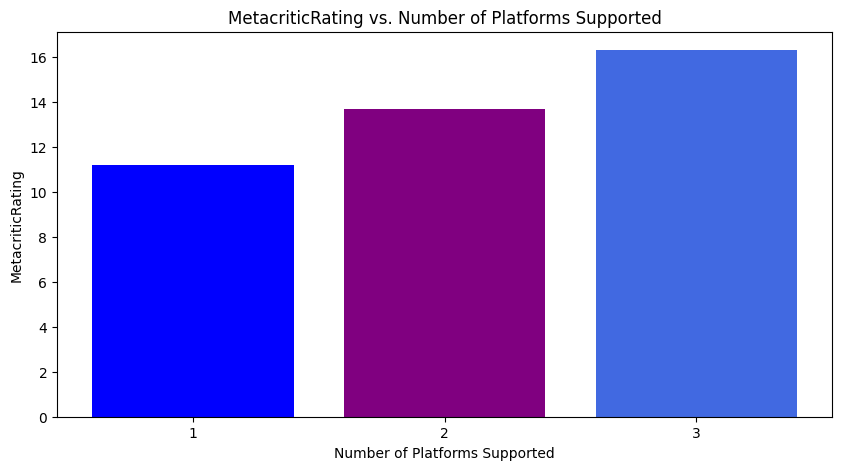

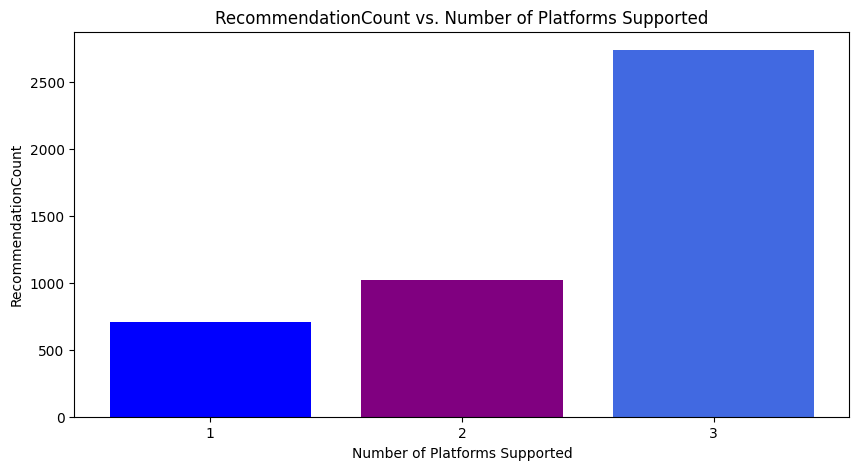

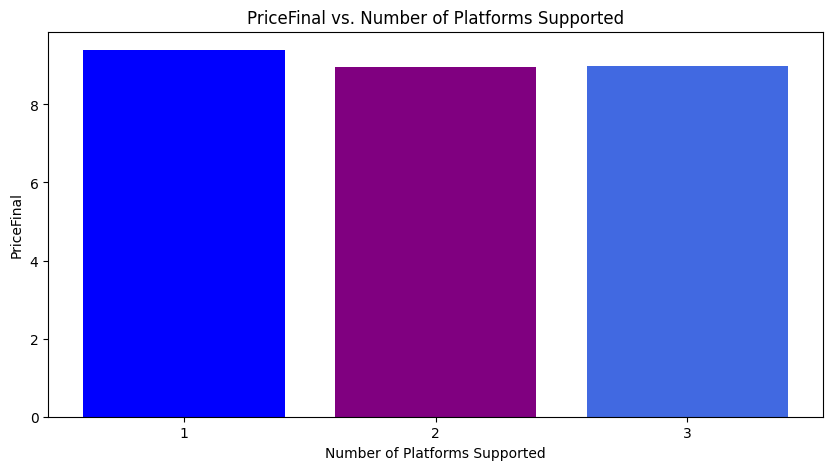

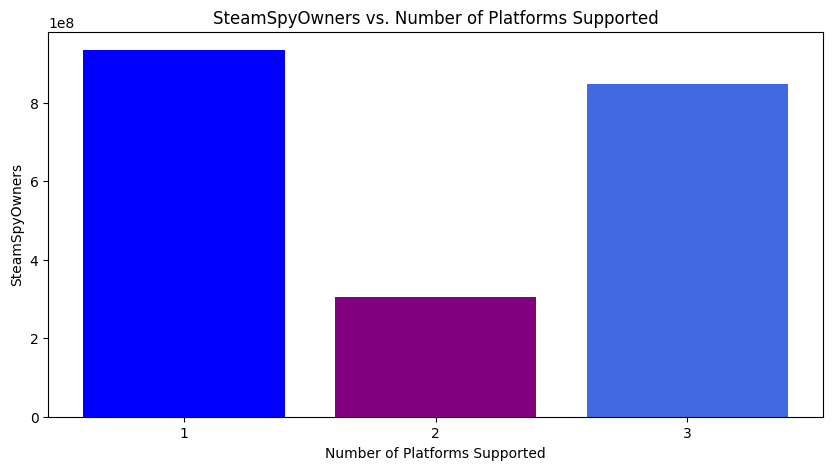

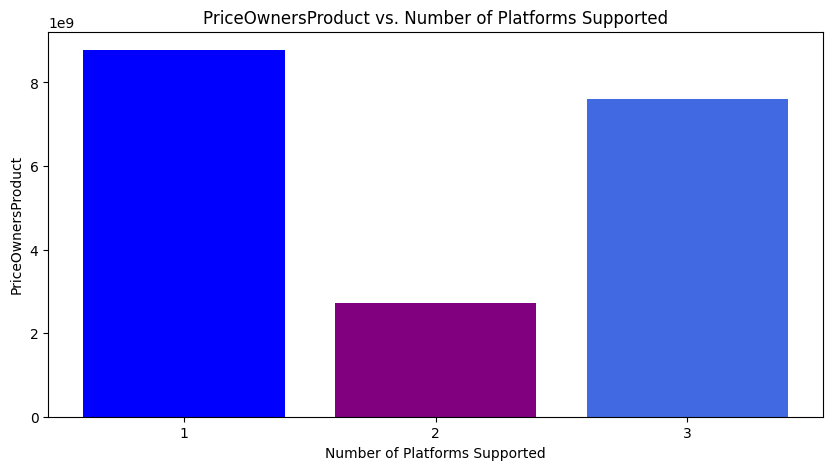

In [13]:
# Set custom colors for the bars
colors = ['blue', 'purple', 'royalblue']

# Loop through the metrics and create bar charts
metrics = ['MetacriticRating', 'RecommendationCount', 'PriceFinal', 'SteamSpyOwners', 'PriceOwnersProduct']

for metric in metrics:
    plt.figure(figsize=(10, 5))
    plt.bar(platform_groups['PlatformCount'], platform_groups[metric], color=colors)
    plt.xlabel('Number of Platforms Supported')
    plt.ylabel(metric)
    plt.title(f'{metric} vs. Number of Platforms Supported')
    plt.xticks(range(1, 4))
    plt.show()

## Analysis

- Games supporting multiple platforms tend to have higher Metacritic ratings and higher popularity (RecommendationCount), suggesting that they may attract more players and receive better reviews.
- The price of games does not show a significant difference based on the number of supported platforms, indicating that pricing may not be a strong factor in platform availability. 
- In summary, games with broader platform support tend to attract more players and receive better reviews, which aligns with the idea that a wider availability of games can lead to increased player engagement and revenue.

### (3) Is there a relationship between Screenshots, Early Access Status and Demos and the number of players?
Create scatterplots to visualize the relationships between the number of screenshots or demos and the mean number of owners.

### 3.1 Screenshots

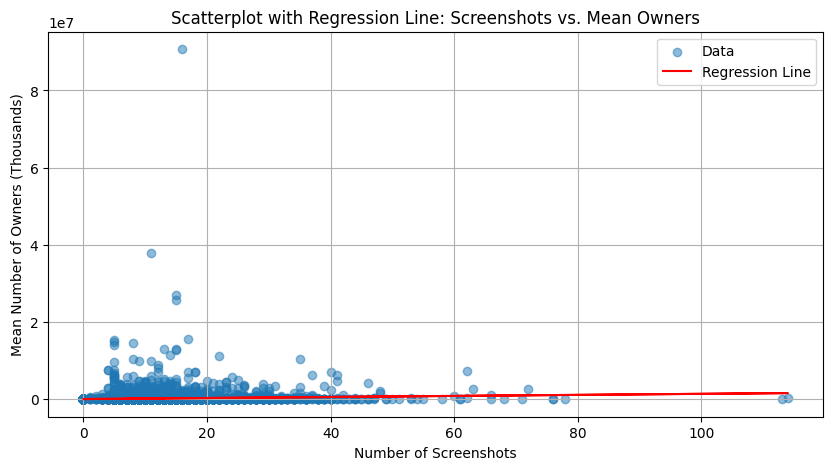

Regression Line Equation: y = 13569.82x + 39278.61
R-squared Value: 0.01


In [14]:
# Define the columns for the scatterplot
x = cleaned_data_df['ScreenshotCount']
y = cleaned_data_df['SteamSpyOwners']

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept

# Create the scatterplot with regression line
plt.figure(figsize=(10, 5))
plt.scatter(x, y, alpha=0.5, label='Data')
plt.plot(x, regression_line, color='red', label='Regression Line')
plt.xlabel('Number of Screenshots')
plt.ylabel('Mean Number of Owners (Thousands)')
plt.title('Scatterplot with Regression Line: Screenshots vs. Mean Owners')
plt.grid(True)
plt.legend()
plt.show()

# Display regression statistics
print(f'Regression Line Equation: y = {slope:.2f}x + {intercept:.2f}')
print(f'R-squared Value: {r_value**2:.2f}')

## Analysis 

- While there might be a slight positive correlation between the number of screenshots and the mean number of owners, it's very weak and not a reliable predictor of the number of owners.
- Other factors or variables likely play a more significant role in determining the number of owners for games.

### 3.2 Early Access Status

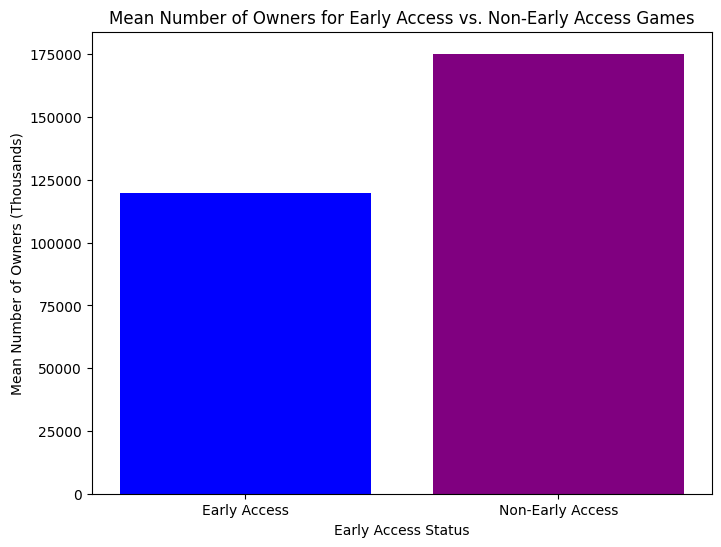

Summary Statistics for Early Access Games:
count    1.323000e+03
mean     1.198905e+05
std      9.754610e+05
min      0.000000e+00
25%      5.330000e+02
50%      2.870000e+03
75%      1.488600e+04
max      2.702529e+07
Name: SteamSpyOwners, dtype: float64

Summary Statistics for Non-Early Access Games:
count    1.100500e+04
mean     1.752416e+05
std      1.174462e+06
min      0.000000e+00
25%      1.614000e+03
50%      1.255400e+04
75%      7.407100e+04
max      9.068758e+07
Name: SteamSpyOwners, dtype: float64

T-Test Results:
T-statistic: -1.6472590643183633
P-value: 0.0995302984014389


In [15]:
# Create a bar chart to compare mean owners for early access vs. non-early access games
early_access_mean = cleaned_data_df[cleaned_data_df['GenreIsEarlyAccess'] == True]['SteamSpyOwners'].mean()
non_early_access_mean = cleaned_data_df[cleaned_data_df['GenreIsEarlyAccess'] == False]['SteamSpyOwners'].mean()

plt.figure(figsize=(8, 6))
plt.bar(['Early Access', 'Non-Early Access'], [early_access_mean, non_early_access_mean], color=['blue', 'purple'])
plt.xlabel('Early Access Status')
plt.ylabel('Mean Number of Owners (Thousands)')
plt.title('Mean Number of Owners for Early Access vs. Non-Early Access Games')
plt.show()

# Calculate summary statistics and perform a t-test
early_access_owners = cleaned_data_df[cleaned_data_df['GenreIsEarlyAccess'] == True]['SteamSpyOwners']
non_early_access_owners = cleaned_data_df[cleaned_data_df['GenreIsEarlyAccess'] == False]['SteamSpyOwners']

early_access_summary = early_access_owners.describe()
non_early_access_summary = non_early_access_owners.describe()

t_stat, p_value = ttest_ind(early_access_owners, non_early_access_owners)

print("Summary Statistics for Early Access Games:")
print(early_access_summary)
print("\nSummary Statistics for Non-Early Access Games:")
print(non_early_access_summary)
print("\nT-Test Results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

## Analysis 

- Based on the data and analysis performed, there is some evidence that non-early access games have a slightly higher mean number of owners compared to early access games. However, this difference is not strong enough to be considered statistically significant at the typical significance level of 0.05. 
- While there may be a small tendency for non-early access games to attract more players on average, the difference is not substantial enough to draw definitive conclusions. Other factors not considered in this analysis may also influence player counts. 

### 3.3 Demos

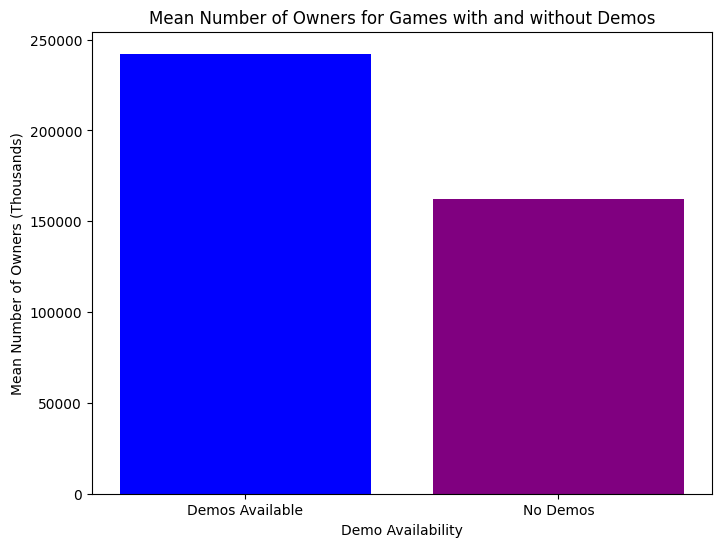

In [16]:
# Calculate the mean number of owners for games with and without demos
demo_mean = cleaned_data_df[cleaned_data_df['DemoCount'] == 1]['SteamSpyOwners'].mean()
no_demo_mean = cleaned_data_df[cleaned_data_df['DemoCount'] == 0]['SteamSpyOwners'].mean()

# Bar chart for Demos vs. Mean Owners
plt.figure(figsize=(8, 6))
plt.bar(['Demos Available', 'No Demos'], [demo_mean, no_demo_mean], color=['blue', 'purple'])
plt.xlabel('Demo Availability')
plt.ylabel('Mean Number of Owners (Thousands)')
plt.title('Mean Number of Owners for Games with and without Demos')
plt.show()

## Analysis

- Comparing these two groups, it appears that games with demos available tend to have a higher mean number of owners compared to games without demos. This suggests that there may be a positive relationship between the availability of demos and the number of players.
- It's important to note that this analysis does not establish causation. While there is a correlation between demos and higher player counts, other factors may also contribute to a game's popularity and player base. Further analysis and research would be needed to explore the causal factors behind this relationship.
- In summary, games with demos available tend to attract a larger number of players on average compared to games without demos, indicating a potential positive relationship between demo availability and player counts.

### (4) Which platform (Windows, Linux, Mac) has the highest game count on average?

Explore whether there's a correlation between the number of games available on each platform and any other relevant metrics, such as average ratings and recommendations.

In [17]:
# Count games per platform

# Group the data by platform (Windows, Mac, Linux)
game_counts_per_platform = cleaned_data_df.groupby(['PlatformWindows', 'PlatformMac', 'PlatformLinux']).size().reset_index(name='GameCount')

# Print the counts
print(game_counts_per_platform)

   PlatformWindows  PlatformMac  PlatformLinux  GameCount
0            False        False           True          1
1            False         True          False          1
2             True        False          False       7864
3             True        False           True        242
4             True         True          False       1612
5             True         True           True       2608


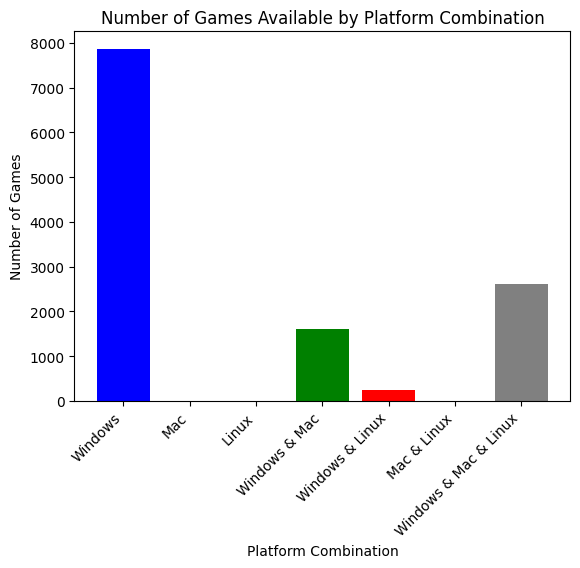

In [18]:
# Empty dictionary to store game counts for each platform combination
game_counts = {
    'Windows': 0,
    'Mac': 0,
    'Linux': 0,
    'Windows & Mac': 0,
    'Windows & Linux': 0,
    'Mac & Linux': 0,
    'Windows & Mac & Linux': 0  
}

# Iterate through the rows of the DataFrame and update the game_counts dictionary
for _, row in game_counts_per_platform.iterrows():
    platforms = []
    if row['PlatformWindows']:
        platforms.append('Windows')
    if row['PlatformMac']:
        platforms.append('Mac')
    if row['PlatformLinux']:
        platforms.append('Linux')

    # Update the game_counts dictionary based on the platforms in this row
    platform_combination = ' & '.join(platforms)
    game_counts[platform_combination] = row['GameCount']

# Create a new DataFrame from the game_counts dictionary
platform_counts_df = pd.DataFrame(list(game_counts.items()), columns=['Platform', 'GameCount'])

# Create a bar chart to visualize game counts for each platform and combination
plt.bar(platform_counts_df['Platform'], platform_counts_df['GameCount'], 
        color=['blue', 'purple', 'orange', 'green', 'red', 'pink', 'gray']) 
plt.title('Number of Games Available by Platform Combination')
plt.xlabel('Platform Combination')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.show()

In [19]:
# Define a function to categorize the platform for each game
def categorize_platform(row):
    if row['PlatformWindows'] and not row['PlatformMac'] and not row['PlatformLinux']:
        return 'W'
    elif not row['PlatformWindows'] and row['PlatformMac'] and not row['PlatformLinux']:
        return 'M'
    elif not row['PlatformWindows'] and not row['PlatformMac'] and row['PlatformLinux']:
        return 'L'
    elif row['PlatformWindows'] and row['PlatformMac'] and not row['PlatformLinux']:
        return 'WM'
    elif row['PlatformWindows'] and not row['PlatformMac'] and row['PlatformLinux']:
        return 'WL'
    elif not row['PlatformWindows'] and row['PlatformMac'] and row['PlatformLinux']:
        return 'ML'
    elif row['PlatformWindows'] and row['PlatformMac'] and row['PlatformLinux']:
        return 'WML'
    else:
        return 'Other'

# Add the 'GameCount' column based on platform categories
cleaned_data_df['GameCount'] = cleaned_data_df.apply(categorize_platform, axis=1)

# Calculate the mean rating and recommendation for each platform category
platform_means = cleaned_data_df.groupby('GameCount')[['MetacriticRating', 'RecommendationCount']].mean().reset_index()

# Print the platform means
print(platform_means)

  GameCount  MetacriticRating  RecommendationCount
0         L          0.000000             0.000000
1         M          0.000000           197.000000
2         W         11.195956           704.342701
3        WL          9.495868          1674.090909
4        WM         14.272953           920.156328
5       WML         16.289494          2738.563267


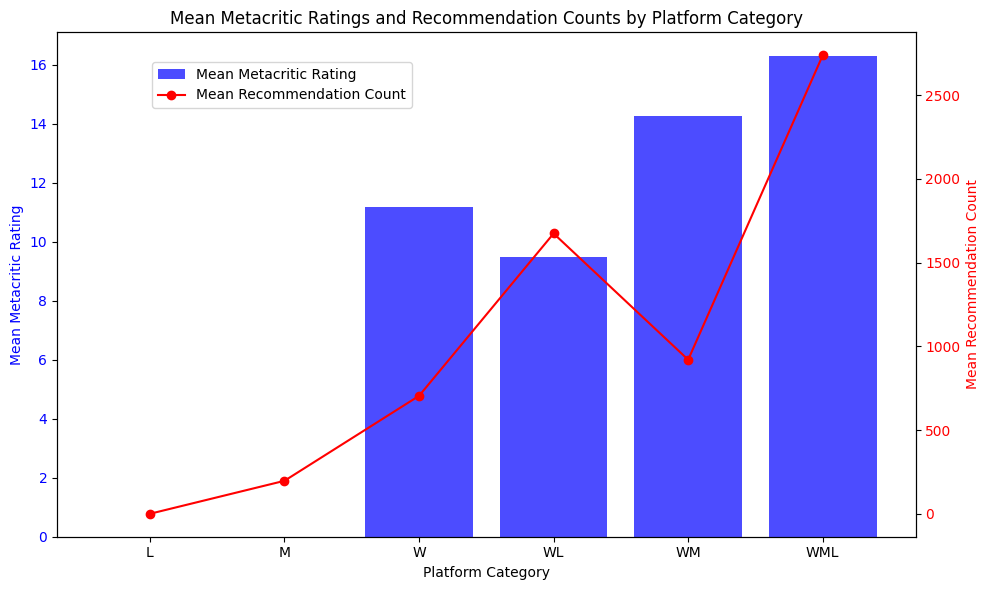

In [20]:
# Data from the platform_means DataFrame
categories = platform_means['GameCount']
mean_metacritic_ratings = platform_means['MetacriticRating']
mean_recommendation_counts = platform_means['RecommendationCount']

# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot mean Metacritic ratings
ax1.bar(categories, mean_metacritic_ratings, color='b', alpha=0.7, label='Mean Metacritic Rating')
ax1.set_xlabel('Platform Category')
ax1.set_ylabel('Mean Metacritic Rating', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for recommendation counts
ax2 = ax1.twinx()
ax2.plot(categories, mean_recommendation_counts, color='r', marker='o', label='Mean Recommendation Count')
ax2.set_ylabel('Mean Recommendation Count', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legend
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.9))

# Set the title and show the plot
plt.title('Mean Metacritic Ratings and Recommendation Counts by Platform Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analysis 

- Windows is the most dominant gaming platform, with a significantly higher number of games available compared to Mac and Linux.
- Games available on the Windows & Mac combination seem to have higher Metacritic ratings and recommendation counts, indicating a positive reception among users and critics.
- The combination of all three platforms (Windows, Mac, and Linux) results in the highest mean recommendation count, suggesting that cross-platform availability may lead to increased user engagement and recommendations.

### (5) Is there any advantage to developing a Single-Player or a multi-player game?

In [21]:
#Get average stats for games that are "Single Player"
singleplayer_df = cleaned_data_df.loc[cleaned_data_df["CategorySinglePlayer"] == True]
single_count = singleplayer_df["GameName"].count()
single_players = singleplayer_df["SteamSpyPlayersEstimate"].mean()
single_owners = singleplayer_df["SteamSpyOwners"].mean()
single_ratings = singleplayer_df["MetacriticRating"].mean()
single_recom = singleplayer_df["RecommendationCount"].mean()

#Get average stats for games that are "Multi Player"
multiplayer_df = cleaned_data_df.loc[cleaned_data_df["CategoryMultiplayer"] == True]
multi_count = multiplayer_df["GameName"].count()
multi_players = multiplayer_df["SteamSpyPlayersEstimate"].mean()
multi_owners = multiplayer_df["SteamSpyOwners"].mean()
multi_ratings = multiplayer_df["MetacriticRating"].mean()
multi_recom = multiplayer_df["RecommendationCount"].mean()

single_multi_df = pd.DataFrame({"Game Category": ["Single Player", "Multi Player"],
                                "Count": [single_count, multi_count],
                                "Owners (Thousands)": [single_owners/1000, multi_owners/1000],
                                "Players (Thousands)": [single_players/1000, multi_players/1000],
                                "Ratings": [single_ratings, multi_ratings],
                                "Recommendations (Hundreds)": [single_recom/100, multi_recom/100]})

single_multi_df.head()

,Game Category,Count,Owners (Thousands),Players (Thousands),Ratings,Recommendations (Hundreds)
0,Single Player,10772,145.056097,92.595144,13.838006,9.503439
1,Multi Player,3171,389.849698,273.088786,19.682750,29.901611


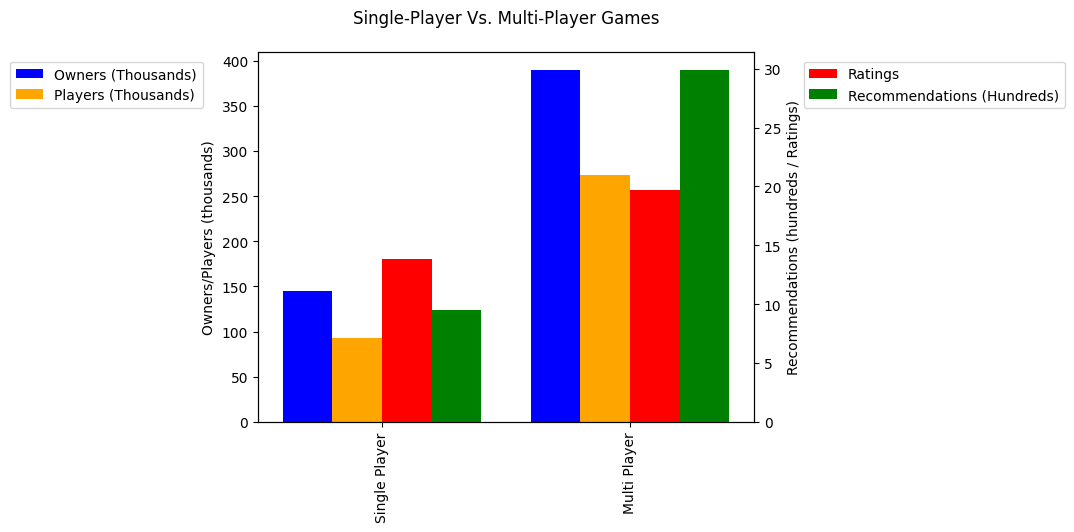

In [22]:

fig = plt.figure() # Create matplotlib figure



#tick_locations = [0.25,0.75]
#plt.xticks(tick_locations,["Single Player", "Multi Player"])

ax1 = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax1.twinx()



single_multi_df["Owners (Thousands)"].plot(kind = "bar", ax=ax1, color = "blue", position=2, width = 0.2)
single_multi_df["Players (Thousands)"].plot(kind = "bar", ax=ax1, color = "orange", position=1, width = 0.2)
single_multi_df["Ratings"].plot(kind = "bar", ax=ax2, color = 'red', width = 0.2, position = 0)
single_multi_df["Recommendations (Hundreds)"].plot(kind = "bar", ax=ax2, color = 'green', width = 0.2, position = -1)



ax1.set_ylabel("Owners/Players (thousands)")
ax2.set_ylabel("Recommendations (hundreds / Ratings)")
plt.title("Single-Player Vs. Multi-Player Games\n")
plt.xlim(-0.5,1.5)

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=(-0.5, 0.85))
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels, loc=(1.1, 0.85))


tick_locations = [0,1]
plt.xticks(tick_locations,["Single Player", "Multi Player"], rotation = 0)

#plt.tight_layout()
plt.show()

Analysis of games based on whether they are single-player or multi-player games, shows a significant advantage for multi-player games in terms of mean number of players, mean number of owners, mean Metacritic rating and mean number of recommendations on Steam.
This suggests that multi-player games tend to be more popular and successful.

### (6) Are there any apparent genre trends across the past 3 decades?

In [23]:
#load imdb-videogames.csv
imdb_games_file = "Resources/imdb-videogames.csv"
imdbgames_data = pd.read_csv(imdb_games_file)


In [24]:

#List of genres
genres_list = ["Action","Adventure","Comedy","Crime","Family","Fantasy","Mystery","Sci-Fi","Thriller"]

#Create dataframe for genre percentages per year
genre_counts_df = pd.DataFrame()

ind = 0
for i in range(1985, 2020):

    genre_counts_df.loc[ind, "Year"] = i

    #Get total count of games per year
    total_count = len(imdbgames_data[(imdbgames_data['year'] == i)])


    #For each genre
    for genre in genres_list:
        #get count of genre for the year
        count = len(imdbgames_data[(imdbgames_data[genre]==True) & (imdbgames_data['year'] == i)] )
        #set percentage of genre
        genre_counts_df.loc[ind, genre] = count*100/total_count

    ind += 1


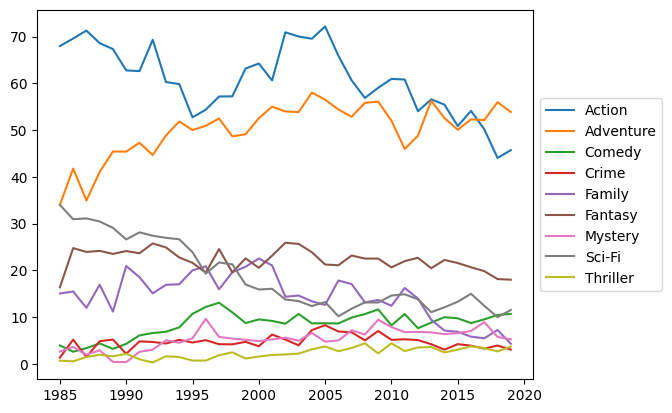

In [25]:

#Create Dataframe with genre counts
for genre in genres_list:
    plt.plot(genre_counts_df["Year"], genre_counts_df[genre], label = genre)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()



In [26]:
group0 = genre_counts_df["Adventure"]
group1 = genre_counts_df["Comedy"]
group2 = genre_counts_df["Crime"]
group3 = genre_counts_df["Family"]
group4 = genre_counts_df["Fantasy"]
group5 = genre_counts_df["Mystery"]
group6 = genre_counts_df["Sci-Fi"]
group7 = genre_counts_df["Thriller"]

import scipy.stats as stats
stats.f_oneway(group0, group1, group2, group3, group4, group5, group6 , group7)

F_onewayResult(statistic=511.4746856295056, pvalue=1.5499900925155418e-152)

Analysis of the percentage of genres between 1985 and 2019, shows that while Action has been the dominant genre for decades, Adventure has been steadily rising in prominence, surpassing Action after 2015.
Also observed, is that the percentages of Family and Sci-Fi games have been decreasing, while other genres have kept relatively steady levels. It is to be noted, that this does not reflect a decrease in the number of Family or Sci-Fi games, only of their percentages relative to the total number of games per year. In fact, the number of games have been increasing per year across all genres.

# 7-Games Released Month and Price Analysis

In [27]:
#Find The Game with Best Price Increase.
priceFinal=np.array(cleaned_data_df["PriceFinal"])
priceInitital=np.array(cleaned_data_df["PriceInitial"])

In [28]:
#Price difference Data
cleaned_data_df["ChangePrice"]=np.subtract(priceFinal,priceInitital)
cleaned_data_df.head()

,Unnamed: 0,GameName,ReleaseDate,DemoCount,MetacriticRating,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyPlayersEstimate,ControllerSupport,...,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,PriceFinal,CategorySinglePlayer,CategoryMultiplayer,PlatformCount,GameCount,ChangePrice
0,0,Counter-Strike,2000-11-01,0,88,68991,13,13033334,9140731,False,...,False,False,False,9.99,9.99,False,True,3,WML,0.0
1,1,Team Fortress Classic,1999-04-01,0,0,2439,5,5399140,753627,False,...,False,False,False,4.99,4.99,False,True,3,WML,0.0
2,2,Day of Defeat,2003-05-01,0,79,2319,5,7621102,1709740,False,...,False,False,False,4.99,4.99,False,True,3,WML,0.0
3,3,Deathmatch Classic,2001-06-01,0,0,888,4,7498965,789676,False,...,False,False,False,4.99,4.99,False,True,3,WML,0.0
4,4,Half-Life: Opposing Force,1999-11-01,0,0,2934,5,5399499,705741,False,...,False,False,False,4.99,4.99,True,True,3,WML,0.0


In [29]:
#Price Change Analysis
pc_change_df=cleaned_data_df["ChangePrice"].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})
pc_change_df

,ChangePrice,count
0,0.00,11627
1,-1.50,40
2,-1.00,34
3,-0.50,30
4,-3.00,29
...,...,...
158,-9.90,1
159,-5.20,1
160,-4.62,1
161,-33.00,1


# 7.1 Find the Max and Min Price change

In [30]:
Max_price_change=pc_change_df["ChangePrice"].max()
print(f"Maximum price change in : {Max_price_change}")

Maximum price change in : 0.0


In [31]:
Min_price_change=pc_change_df["ChangePrice"].min()
print(f"Minimum price change in : {Min_price_change}")

Minimum price change in : -140.8


In [32]:
# Median calculation
median_pc=cleaned_data_df["ChangePrice"].median()
print(f'Median is:{median_pc}')

Median is:0.0


# 7.2 Visualization of price Change 

# Histogram 

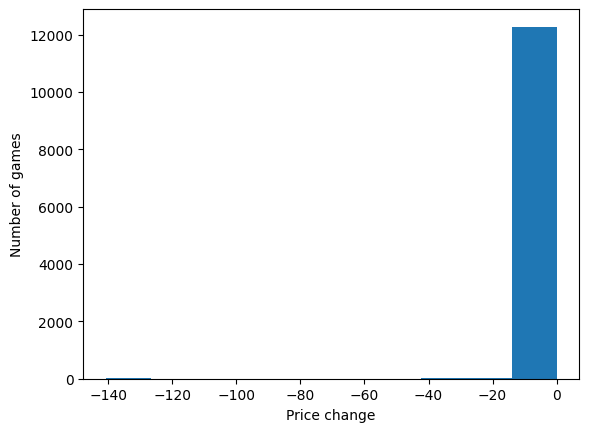

In [33]:
histoPlot=cleaned_data_df["ChangePrice"].plot.hist()
plt.xlabel("Price change")
plt.ylabel("Number of games")
plt.show()

# Line Chart

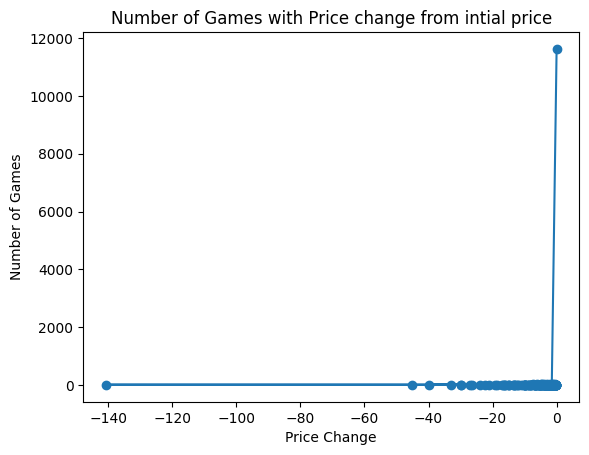

In [34]:
x_values_p=pc_change_df["ChangePrice"]
y_values_n=pc_change_df["count"]
plt.plot(x_values_p,y_values_n,marker="o")
plt.xlabel("Price Change")
plt.ylabel("Number of Games")
plt.title("Number of Games with Price change from intial price")
plt.show()

# 7.3 Analysis of game price change
from histogram it is evident that majority of games did not have any price change from their initial price change. The data shows none of the game had postive increase in their price. instead there was decrease in price was observed in some games.The Median value is zero. Minimum price change was -140.0

# 7.4 Determining the Month with most Released the Games

In order to find the month with most number of released games on steam engine, is determined by finding out the month with maximum number of games released in past three decades.

In [43]:
#convert Date & Time string to datetime64 Data type
cleaned_data_df["ReleaseDate"]=pd.to_datetime(cleaned_data_df["ReleaseDate"])

In [44]:
cleaned_data_df.dtypes

Unnamed: 0                              int64
GameName                               object
ReleaseDate                    datetime64[ns]
DemoCount                               int64
MetacriticRating                        int64
RecommendationCount                     int64
ScreenshotCount                         int64
SteamSpyOwners                          int64
SteamSpyPlayersEstimate                 int64
ControllerSupport                        bool
IsFree                                   bool
FreeVerAvail                             bool
PurchaseAvail                            bool
SubscriptionAvail                        bool
PlatformWindows                          bool
PlatformLinux                            bool
PlatformMac                              bool
GenreIsNonGame                           bool
GenreIsIndie                             bool
GenreIsAction                            bool
GenreIsAdventure                         bool
GenreIsCasual                     

In [45]:
# Organize the data by Month and year
cleaned_data_df.sort_values(by='ReleaseDate',ascending=False)
cleaned_data_df.head(5)

,Unnamed: 0,GameName,ReleaseDate,DemoCount,MetacriticRating,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyPlayersEstimate,ControllerSupport,...,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,PriceFinal,CategorySinglePlayer,CategoryMultiplayer,PlatformCount,GameCount,ChangePrice
0,0,Counter-Strike,2000-11-01,0,88,68991,13,13033334,9140731,False,...,False,False,False,9.99,9.99,False,True,3,WML,0.0
1,1,Team Fortress Classic,1999-04-01,0,0,2439,5,5399140,753627,False,...,False,False,False,4.99,4.99,False,True,3,WML,0.0
2,2,Day of Defeat,2003-05-01,0,79,2319,5,7621102,1709740,False,...,False,False,False,4.99,4.99,False,True,3,WML,0.0
3,3,Deathmatch Classic,2001-06-01,0,0,888,4,7498965,789676,False,...,False,False,False,4.99,4.99,False,True,3,WML,0.0
4,4,Half-Life: Opposing Force,1999-11-01,0,0,2934,5,5399499,705741,False,...,False,False,False,4.99,4.99,True,True,3,WML,0.0


In [46]:
#Convert Day ,Month year to Month and Year
# Use DataFrame.apply() with lambda function and strftime()
cleaned_data_df['Month_Year'] = cleaned_data_df['ReleaseDate'].apply(lambda x: x.strftime('%B-%Y')) 
cleaned_data_df.head()

,Unnamed: 0,GameName,ReleaseDate,DemoCount,MetacriticRating,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyPlayersEstimate,ControllerSupport,...,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,PriceFinal,CategorySinglePlayer,CategoryMultiplayer,PlatformCount,GameCount,ChangePrice,Month_Year
0,0,Counter-Strike,2000-11-01,0,88,68991,13,13033334,9140731,False,...,False,False,9.99,9.99,False,True,3,WML,0.0,November-2000
1,1,Team Fortress Classic,1999-04-01,0,0,2439,5,5399140,753627,False,...,False,False,4.99,4.99,False,True,3,WML,0.0,April-1999
2,2,Day of Defeat,2003-05-01,0,79,2319,5,7621102,1709740,False,...,False,False,4.99,4.99,False,True,3,WML,0.0,May-2003
3,3,Deathmatch Classic,2001-06-01,0,0,888,4,7498965,789676,False,...,False,False,4.99,4.99,False,True,3,WML,0.0,June-2001
4,4,Half-Life: Opposing Force,1999-11-01,0,0,2934,5,5399499,705741,False,...,False,False,4.99,4.99,True,True,3,WML,0.0,November-1999


In [47]:
#Sorting and reindexing the Data
sorted_cleaned_df=cleaned_data_df["Month_Year"].sort_values(ascending=False)
count_sorted_cleaned_df=cleaned_data_df["Month_Year"].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})
count_sorted_cleaned_df

,Month_Year,count
0,August-2016,924
1,September-2016,620
2,June-2016,510
3,July-2016,479
4,October-2016,440
...,...,...
156,April-1999,1
157,August-2005,1
158,March-2001,1
159,December-2001,1


In [48]:
#split the month and years to perform month month analysis
count_sorted_cleaned_df[["Month","Year"]]=count_sorted_cleaned_df["Month_Year"].str.split("-",expand=True)
count_sorted_cleaned_df

,Month_Year,count,Month,Year
0,August-2016,924,August,2016
1,September-2016,620,September,2016
2,June-2016,510,June,2016
3,July-2016,479,July,2016
4,October-2016,440,October,2016
...,...,...,...,...
156,April-1999,1,April,1999
157,August-2005,1,August,2005
158,March-2001,1,March,2001
159,December-2001,1,December,2001


In [49]:
#Filter out the required columns
split_data_df=count_sorted_cleaned_df[["Month","Year","count"]]
split_data_df

,Month,Year,count
0,August,2016,924
1,September,2016,620
2,June,2016,510
3,July,2016,479
4,October,2016,440
...,...,...,...
156,April,1999,1
157,August,2005,1
158,March,2001,1
159,December,2001,1


In [50]:
#Set Month as index 
split_data_df.set_index("Month")

,Year,count
Month,,
August,2016,924
September,2016,620
June,2016,510
July,2016,479
October,2016,440
...,...,...
April,1999,1
August,2005,1
March,2001,1


In [51]:
#Organize the month in Actual order
monthly_sum=split_data_df.groupby(["Month"])["count"].sum()
monthly_sum_df=monthly_sum.reset_index().rename(columns={"index": "value", 0: "count"})

#to create organized Months catagory in order
customOrder=["January","February","March","April","May","June","July","August","September","October","November","December"]
monthly_sum_df["Month"]=pd.Categorical(monthly_sum_df["Month"],categories=customOrder,ordered=True)
monthly_sum_df=monthly_sum_df.sort_values(by="Month")
monthly_sum_df

,Month,count
4,January,636
3,February,721
7,March,871
0,April,1000
8,May,1030
6,June,1038
5,July,1139
1,August,1548
11,September,1267
10,October,1237


In [52]:
#Seting the the index of new data frame
monthly_sum_df=monthly_sum_df.set_index("Month")

# 7.5 Visualization Most Released Games month

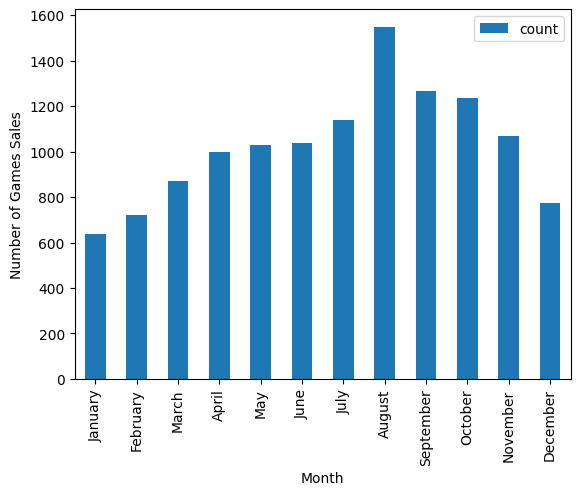

In [53]:
#Plot the Month to Month data to visualize the month with maximum number of Games released.
monthly_sum_df.plot(kind="bar",xlabel="Month",ylabel="Number of Games Sales")

plt.show()

# Month with Maximum number of Games Released
The month of August is with most games released.

# 8. Top 20 games based on Games Rating

In [54]:
#create a new Data Frame
new_top20=pd.DataFrame({"GameName":cleaned_data_df["GameName"],
                         "MetacriticRating":cleaned_data_df["MetacriticRating"]})
new_top20

,GameName,MetacriticRating
0,Counter-Strike,88
1,Team Fortress Classic,0
2,Day of Defeat,79
3,Deathmatch Classic,0
4,Half-Life: Opposing Force,0
...,...,...
12323,Baseball Riot,0
12324,Passage 4,0
12325,Piximalism,0
12326,Technoball,0


In [55]:
#choose top 20 based on rating
new_top20=new_top20.loc[new_top20["MetacriticRating"]>85,:]
new_top20

,GameName,MetacriticRating
0,Counter-Strike,88
6,Half-Life,96
9,Half-Life 2,96
10,Counter-Strike: Source,88
16,Half-Life 2: Episode One,87
...,...,...
7597,HEX: Shards of Fate,87
7694,STEINS;GATE,87
7701,Stardew Valley,88
11287,Sid Meiers Civilization(r) VI,94


In [56]:
new_top20=new_top20.reset_index()
new_top20

,index,GameName,MetacriticRating
0,0,Counter-Strike,88
1,6,Half-Life,96
2,9,Half-Life 2,96
3,10,Counter-Strike: Source,88
4,16,Half-Life 2: Episode One,87
...,...,...,...
182,7597,HEX: Shards of Fate,87
183,7694,STEINS;GATE,87
184,7701,Stardew Valley,88
185,11287,Sid Meiers Civilization(r) VI,94


In [57]:
# Remove un-necessary columns
columns_to_delte=["index"]
cleaned_T20=new_top20.drop(columns=columns_to_delte)

In [58]:
#output of cleaned Data frame
Top20_Meta=cleaned_T20.sort_values(by="MetacriticRating",ascending=False)

In [59]:
Top20_Meta=Top20_Meta.reset_index()

In [60]:
del Top20_Meta["index"]

In [61]:
#output of clean and organized Data Frame
Top20_Meta

,GameName,MetacriticRating
0,BioShock(tm),96
1,Half-Life 2,96
2,Half-Life,96
3,Grand Theft Auto V,96
4,Portal 2,95
...,...,...
182,Bionic Commando: Rearmed,86
183,The Witcher: Enhanced Edition Directors Cut,86
184,Dead Space,86
185,Astebreed,86


In [66]:
#Extract Top 20 from the data set 
data_list=[]
count=0
for index,row in Top20_Meta.iterrows():
    
    if count<20:
        gameName=row["GameName"]
        MetaRanking=row["MetacriticRating"]
        data_list.append((gameName,MetaRanking))
        count +=1
    else:
        break

In [67]:
# create Data Frame of the extraced Data
catagorized20=pd.DataFrame(data_list,columns=["gameName","gameRating"])
catagorized20=catagorized20.sort_values(by="gameRating",ascending=False)
Top20_M=catagorized20.reset_index()
Top20_M

,index,gameName,gameRating
0,0,BioShock(tm),96
1,2,Half-Life,96
2,3,Grand Theft Auto V,96
3,1,Half-Life 2,96
4,4,Portal 2,95
5,9,The Elder Scrolls IV: Oblivion(r) Game of the ...,94
6,13,Sid Meiers Civilization(r) VI,94
7,12,Grand Theft Auto: Vice City,94
8,11,BioShock Infinite,94
9,10,Sid Meiers Civilization(r) IV,94


In [68]:
# Reset index to get organized data
del Top20_M["index"]
Top20_M

,gameName,gameRating
0,BioShock(tm),96
1,Half-Life,96
2,Grand Theft Auto V,96
3,Half-Life 2,96
4,Portal 2,95
5,The Elder Scrolls IV: Oblivion(r) Game of the ...,94
6,Sid Meiers Civilization(r) VI,94
7,Grand Theft Auto: Vice City,94
8,BioShock Infinite,94
9,Sid Meiers Civilization(r) IV,94


# 8.1 Visualization of the Data 

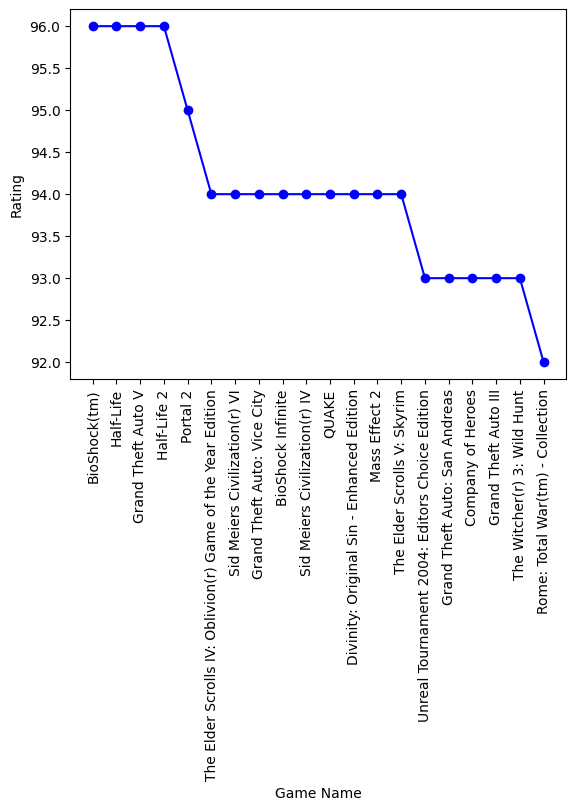

In [69]:
# visualize the Games Rating
x_cl=Top20_M["gameName"]
y_cl=Top20_M["gameRating"]
plt.plot(x_cl,y_cl,color="blue",marker="o")
plt.xticks(rotation=90)
plt.xlabel("Game Name")
plt.ylabel("Rating")

plt.show()

# Conclusion
Based on the all times rating comparison "Bio shock,Grand theft auto,Half life" and "Half Life 2" are top rated games with 96 rating.

# 8.2 Top 20 Games based on Recommendation

In [70]:
R_Top20=pd.DataFrame({"GameName":cleaned_data_df["GameName"],
                         "RecommendationCount":cleaned_data_df["RecommendationCount"]})
R_Top20

,GameName,RecommendationCount
0,Counter-Strike,68991
1,Team Fortress Classic,2439
2,Day of Defeat,2319
3,Deathmatch Classic,888
4,Half-Life: Opposing Force,2934
...,...,...
12323,Baseball Riot,0
12324,Passage 4,0
12325,Piximalism,0
12326,Technoball,0


In [71]:
#choose top 20 on Recommendation count.
R_Top20=R_Top20.loc[R_Top20["RecommendationCount"]>20000,:]
R_Top20

,GameName,RecommendationCount
0,Counter-Strike,68991
9,Half-Life 2,35792
10,Counter-Strike: Source,53931
17,Portal,27535
19,Team Fortress 2,383949
...,...,...
6521,DOOM,23915
6563,Dead by Daylight,30933
6946,Undertale,60314
7701,Stardew Valley,28507


In [72]:
# sortng and re-indexing 
sorted_R_Top_20=R_Top20.sort_values(by="RecommendationCount",ascending=False)
sorted_R_Top_20=sorted_R_Top_20.reset_index()
sorted_R_Top_20

,index,GameName,RecommendationCount
0,25,Counter-Strike: Global Offensive,1427633
1,22,Dota 2,590480
2,19,Team Fortress 2,383949
3,142,Garrys Mod,237684
4,3793,Unturned,222301
...,...,...,...
104,1122,Sniper Elite V2,20555
105,1568,Call of Duty(r): Advanced Warfare - Gold Edition,20533
106,2703,Subnautica,20434
107,788,Red Orchestra 2: Heroes of Stalingrad with Ris...,20235


In [73]:
#Extract Top 100 from the data set 
data_list1=[]
count=0
for index,row in sorted_R_Top_20.iterrows():
    
    if count<20:
        gameName=row["GameName"]
        recommendation=row["RecommendationCount"]
        data_list1.append((gameName,recommendation))
        count +=1
    else:
        break

In [74]:
# create Data Frame of the extraced Data
R_catagorized20=pd.DataFrame(data_list1,columns=["GameName","RecommmendationCount"])
R_catagorized20=R_catagorized20.sort_values(by="RecommmendationCount",ascending=False)
R_Top20_R=R_catagorized20.reset_index()
R_Top20_R

,index,GameName,RecommmendationCount
0,0,Counter-Strike: Global Offensive,1427633
1,1,Dota 2,590480
2,2,Team Fortress 2,383949
3,3,Garrys Mod,237684
4,4,Unturned,222301
5,5,PAYDAY 2,219763
6,6,The Elder Scrolls V: Skyrim,182587
7,7,DayZ,153350
8,8,Rust,145688
9,9,Left 4 Dead 2,140726


In [75]:
del R_Top20_R["index"]

In [76]:
#output of the cleaned Data
R_Top20_R

,GameName,RecommmendationCount
0,Counter-Strike: Global Offensive,1427633
1,Dota 2,590480
2,Team Fortress 2,383949
3,Garrys Mod,237684
4,Unturned,222301
5,PAYDAY 2,219763
6,The Elder Scrolls V: Skyrim,182587
7,DayZ,153350
8,Rust,145688
9,Left 4 Dead 2,140726


# 8.3 Visualization of Data

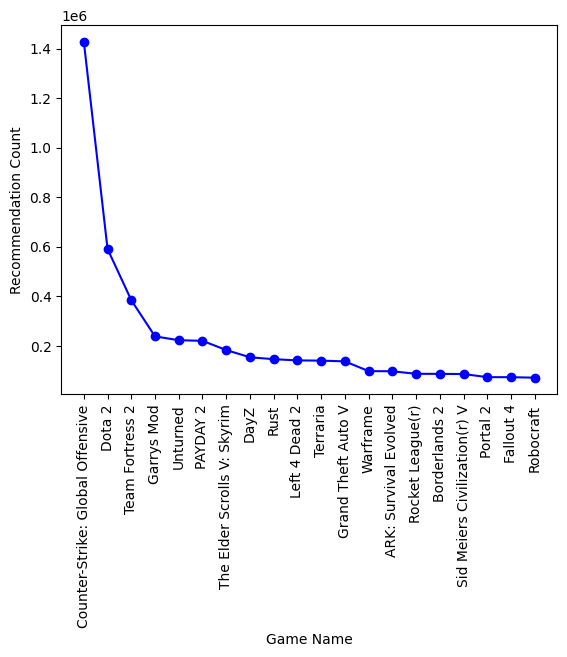

In [77]:
#Visualize the Data
x_cl=R_Top20_R["GameName"]
y_cl=R_Top20_R["RecommmendationCount"]
plt.plot(x_cl,y_cl,color="blue",marker="o")
plt.xticks(rotation=90)
plt.xlabel("Game Name")
plt.ylabel("Recommendation Count")

plt.show()

# Conclusion
Based on the data"Counter-Strike:Global offensive" is most recommended game.

# 9. Comparison of Top 20 Games based on Action Genre
Top 20 Action Genre Games based on Meta critic Rating

In [78]:
G_Top20=pd.DataFrame({"GameName":cleaned_data_df["GameName"],
                         "GenreIsAction":cleaned_data_df["GenreIsAction"],
                         "MetacriticRating":cleaned_data_df["MetacriticRating"]})
G_Top20

,GameName,GenreIsAction,MetacriticRating
0,Counter-Strike,True,88
1,Team Fortress Classic,True,0
2,Day of Defeat,True,79
3,Deathmatch Classic,True,0
4,Half-Life: Opposing Force,True,0
...,...,...,...
12323,Baseball Riot,False,0
12324,Passage 4,False,0
12325,Piximalism,True,0
12326,Technoball,True,0


In [79]:
# sorting Data
G_Top20.sort_values(by="MetacriticRating",ascending=False)

,GameName,GenreIsAction,MetacriticRating
221,BioShock(tm),True,96
6,Half-Life,True,96
2874,Grand Theft Auto V,True,96
9,Half-Life 2,True,96
23,Portal 2,True,95
...,...,...,...
5291,Saint Seiya: Soldiers Soul,True,0
5292,Abyss Raiders: Uncharted,True,0
5293,Abyss Cave,True,0
5294,Wooden Floor,False,0


In [80]:
#choose top 20 based on rating
R_Top20=G_Top20.loc[cleaned_data_df["GenreIsAction"]==True]
t20_game=R_Top20.sort_values(by="MetacriticRating",ascending=False)
t20_game1=t20_game.reset_index()
t20_game1

,index,GameName,GenreIsAction,MetacriticRating
0,2874,Grand Theft Auto V,True,96
1,6,Half-Life,True,96
2,9,Half-Life 2,True,96
3,221,BioShock(tm),True,96
4,23,Portal 2,True,95
...,...,...,...,...
5131,5250,16 Bit Arena,True,0
5132,5251,Caromble!,True,0
5133,5252,Karate Master 2 Knock Down Blow,True,0
5134,5253,Natural Soccer,True,0


In [81]:
new_index=t20_game1.reset_index()
new_index

,level_0,index,GameName,GenreIsAction,MetacriticRating
0,0,2874,Grand Theft Auto V,True,96
1,1,6,Half-Life,True,96
2,2,9,Half-Life 2,True,96
3,3,221,BioShock(tm),True,96
4,4,23,Portal 2,True,95
...,...,...,...,...,...
5131,5131,5250,16 Bit Arena,True,0
5132,5132,5251,Caromble!,True,0
5133,5133,5252,Karate Master 2 Knock Down Blow,True,0
5134,5134,5253,Natural Soccer,True,0


In [82]:
# Extracting Top 20 Games
data_list2=[]
count=0
for index,row in t20_game1.iterrows():
    
    if count<20:
        gameName=row["GameName"]
        isaction=row["GenreIsAction"]
        rating=row["MetacriticRating"]
        data_list2.append((gameName,isaction,rating))
        count +=1
    else:
        break

In [83]:
# Top 20 reindexed file
top_genre=pd.DataFrame(data_list2,columns=["GameName","GenreIsAction","Rating"])
top_genre

,GameName,GenreIsAction,Rating
0,Grand Theft Auto V,True,96
1,Half-Life,True,96
2,Half-Life 2,True,96
3,BioShock(tm),True,96
4,Portal 2,True,95
5,BioShock Infinite,True,94
6,QUAKE,True,94
7,Grand Theft Auto: Vice City,True,94
8,Grand Theft Auto III,True,93
9,Grand Theft Auto: San Andreas,True,93


# 9.1 Visualization

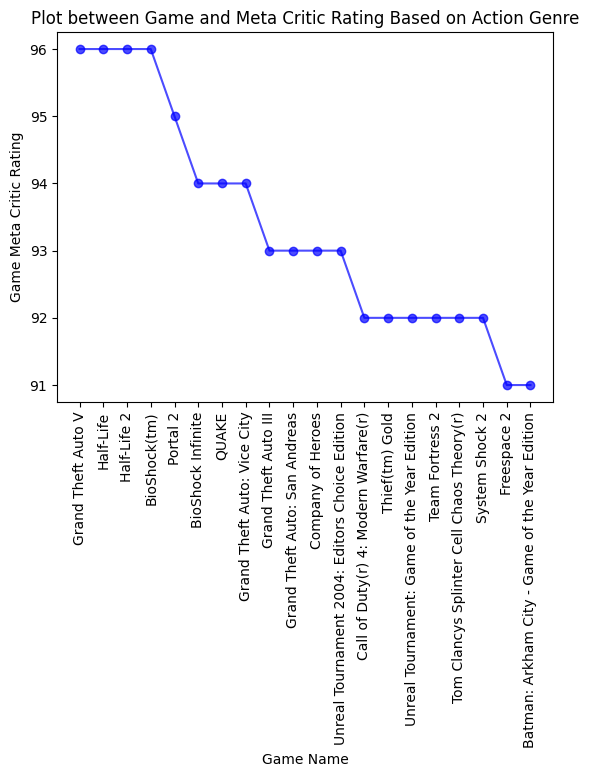

In [120]:
# Visualize the plot
x_axis=top_genre["GameName"]
y_axis=top_genre["Rating"]
plt.plot(x_axis,y_axis,color='b',alpha=0.7,marker="o")

plt.xticks(rotation=90)
plt.xlabel("Game Name")
plt.ylabel("Game Meta Critic Rating")
plt.title("Plot between Game and Meta Critic Rating Based on Action Genre")
plt.show()

# 9.3 Find Top 20 Action Genre game based on Recommendation Count.

In [85]:
#find Top 20 Action Genre game based on Recommendation Count.
Re_Top20=pd.DataFrame({"GameName":cleaned_data_df["GameName"],
                         "GenreIsAction":cleaned_data_df["GenreIsAction"],
                         "RecommendationCount":cleaned_data_df["RecommendationCount"]})
Re_Top20

,GameName,GenreIsAction,RecommendationCount
0,Counter-Strike,True,68991
1,Team Fortress Classic,True,2439
2,Day of Defeat,True,2319
3,Deathmatch Classic,True,888
4,Half-Life: Opposing Force,True,2934
...,...,...,...
12323,Baseball Riot,False,0
12324,Passage 4,False,0
12325,Piximalism,True,0
12326,Technoball,True,0


In [86]:
#Cleaning and Re-organizing data
Rec_sorted=Re_Top20.sort_values(by="RecommendationCount",ascending=False)
Rec_sorted

,GameName,GenreIsAction,RecommendationCount
25,Counter-Strike: Global Offensive,True,1427633
22,Dota 2,True,590480
19,Team Fortress 2,True,383949
142,Garrys Mod,False,237684
3793,Unturned,True,222301
...,...,...,...
6313,Metrico+,False,0
6310,Fleeting Ages,True,0
6309,Sisters Secrecy: Arcanum Bloodlines - Premium ...,False,0
6308,Apothecarium: The Renaissance of Evil - Premiu...,False,0


In [87]:
#Reindex the Data
Rec_sorted=Rec_sorted.reset_index()

In [88]:
# Removing the un-necessary column
del Rec_sorted["index"]

In [89]:
#cleaned output Data Frame
Rec_sorted

,GameName,GenreIsAction,RecommendationCount
0,Counter-Strike: Global Offensive,True,1427633
1,Dota 2,True,590480
2,Team Fortress 2,True,383949
3,Garrys Mod,False,237684
4,Unturned,True,222301
...,...,...,...
12323,Metrico+,False,0
12324,Fleeting Ages,True,0
12325,Sisters Secrecy: Arcanum Bloodlines - Premium ...,False,0
12326,Apothecarium: The Renaissance of Evil - Premiu...,False,0


In [90]:
#Extract Top 20 Games
data_list3=[]
count=0
for index,row in Rec_sorted.iterrows():
    
    if count<20:
        gameName=row["GameName"]
        isaction=row["GenreIsAction"]
        recom=row["RecommendationCount"]
        data_list3.append((gameName,isaction,recom))
        count +=1
    else:
        break

In [91]:
top_genre_rec=pd.DataFrame(data_list3,columns=["GameName","GenreIsAction","RecommendationCount"])
top_genre_rec

,GameName,GenreIsAction,RecommendationCount
0,Counter-Strike: Global Offensive,True,1427633
1,Dota 2,True,590480
2,Team Fortress 2,True,383949
3,Garrys Mod,False,237684
4,Unturned,True,222301
5,PAYDAY 2,True,219763
6,The Elder Scrolls V: Skyrim,False,182587
7,DayZ,True,153350
8,Rust,True,145688
9,Left 4 Dead 2,True,140726


# 9.4 Visualization

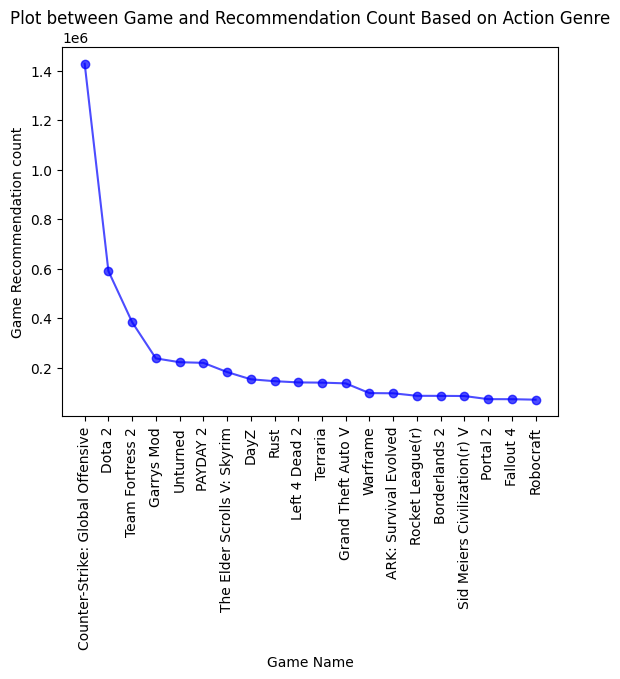

In [92]:
#Visualize Top 20 Games
x_axis=top_genre_rec["GameName"]
y_axis=top_genre_rec["RecommendationCount"]
plt.plot(x_axis,y_axis,color='b',alpha=0.7,marker="o")

plt.xticks(rotation=90)
plt.xlabel("Game Name")
plt.ylabel("Game Recommendation count")
plt.title("Plot between Game and Recommendation Count Based on Action Genre")
plt.show()


# Conclusion of Comparison of Games Based on action Genre
The Top 20 Games obtained from Action Genre Games rating and Recommendation count, it is evident that Action Genre Games are most popular on Steam engine. Action Games gets more rating and recommendations.

# 9.5 Statistical Comparison of All times Top 20 Games vs Action Genre Based Top 20 Games

In [93]:
# Create a DataFrame of Games Based on Rating and Recommendation 
Games_Top20=pd.DataFrame({"allTimesGamesRating":Top20_M["gameName"],
                          "actionGenreGamesRating":top_genre["GameName"],
                          "allTimesGamesRecommendation":R_Top20_R["GameName"],
                          "actionGenreGamesRecommendation":top_genre_rec["GameName"]})

In [94]:
# output of Data Frame
Games_Top20.head()

,allTimesGamesRating,actionGenreGamesRating,allTimesGamesRecommendation,actionGenreGamesRecommendation
0,BioShock(tm),Grand Theft Auto V,Counter-Strike: Global Offensive,Counter-Strike: Global Offensive
1,Half-Life,Half-Life,Dota 2,Dota 2
2,Grand Theft Auto V,Half-Life 2,Team Fortress 2,Team Fortress 2
3,Half-Life 2,BioShock(tm),Garrys Mod,Garrys Mod
4,Portal 2,Portal 2,Unturned,Unturned


In [102]:
# Find if Top 20 all times Rating Games exist in action GenreGamesRating
Games_Top20["InAllTime&ActionGenreRating"]=Games_Top20["allTimesGamesRating"].isin(Games_Top20["actionGenreGamesRating"]).astype(int)

In [103]:
# Find if Top 20 all times Recommendationcount Games exist in action GenreGamesRecommendationcount
Games_Top20["InAllTime&ActionGenreRecommendation"]=Games_Top20["allTimesGamesRecommendation"].isin(Games_Top20["actionGenreGamesRecommendation"]).astype(int)

In [104]:
# output of Top20 Games
Games_Top20

,allTimesGamesRating,actionGenreGamesRating,allTimesGamesRecommendation,actionGenreGamesRecommendation,InAllTime&ActionGenreRecommendation,InAllTime&ActionGenreRating
0,BioShock(tm),Grand Theft Auto V,Counter-Strike: Global Offensive,Counter-Strike: Global Offensive,1,1
1,Half-Life,Half-Life,Dota 2,Dota 2,1,1
2,Grand Theft Auto V,Half-Life 2,Team Fortress 2,Team Fortress 2,1,1
3,Half-Life 2,BioShock(tm),Garrys Mod,Garrys Mod,1,1
4,Portal 2,Portal 2,Unturned,Unturned,1,1
5,The Elder Scrolls IV: Oblivion(r) Game of the ...,BioShock Infinite,PAYDAY 2,PAYDAY 2,1,0
6,Sid Meiers Civilization(r) VI,QUAKE,The Elder Scrolls V: Skyrim,The Elder Scrolls V: Skyrim,1,0
7,Grand Theft Auto: Vice City,Grand Theft Auto: Vice City,DayZ,DayZ,1,1
8,BioShock Infinite,Grand Theft Auto III,Rust,Rust,1,1
9,Sid Meiers Civilization(r) IV,Grand Theft Auto: San Andreas,Left 4 Dead 2,Left 4 Dead 2,1,0


# 9.5.1 Hypothesis Testing - MetacriticRating

# Shapiro Wilk Test

Null Hypothesis= All times MetacriticRating are not different from Action Based Genre MetacriticRating.

In [106]:
# Data Set assignment
data_Set=Games_Top20["InAllTime&ActionGenreRating"]

In [107]:
# Finding Mean for Testing
mean=data_Set.describe()
mean

count    20.000000
mean      0.600000
std       0.502625
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: InAllTime&ActionGenreRating, dtype: float64

In [108]:
# setting mean variable value for hypothesis testing
mean=0.60

In [109]:
#p_value using Shapiro Test
t_statistic, p_value=shapiro(data_Set)
p_value

5.604098078038078e-06

In [110]:
# setting alpha value for hypothesis comparison
alpha=0.05

In [111]:
# printing hypothesis outcome
if p_value < alpha:
    print(f"p_value: {p_value} is less than {alpha} so Null hypothesis is rejected. There is difference between all Times MetacriticRating \
& Action Genre Based Metacrtic Rating")
else:
    print(f"p_value: {p_value} is more than {alpha} so Null hypothesis is accepted. There is no difference between all Times MetacriticRating \
& Action Genre Based Metacrtic Rating")

p_value: 5.604098078038078e-06 is less than 0.05 so Null hypothesis is rejected. There is difference between all Times MetacriticRating & Action Genre Based Metacrtic Rating


# One Sample T-test Hypothesis Testing
We assume that there is no difference between the between the All times Games MetacriticRating Vs Action Genre Based MetacriticRating. So we keep hypothsized mean to 1.

In [112]:
# Setting Hypothesized mean for t-test
hypothsized_mean=1

In [113]:
#p_value from one sample t-test
t_statistic,p_value=ttest_1samp(data_Set,hypothsized_mean)
p_value

0.002094821763962351

In [114]:
if p_value < alpha:
    print(f"p_value: {p_value} is less than {alpha} so Null hypothesis is rejected. There is difference between all Times MetacriticRating \
& Action Genre Based Metacrtic Rating")
else:
    print(f"p_value: {p_value} is more than {alpha} so Null hypothesis is accepted. There is no difference between all Times MetacriticRating \
& Action Genre Based Metacrtic Rating")

p_value: 0.002094821763962351 is less than 0.05 so Null hypothesis is rejected. There is difference between all Times MetacriticRating & Action Genre Based Metacrtic Rating


# 9.5.2 Hypothesis Testing- Recommendationcount
#### Null Hypothesis: All Times Games Recommendationcount is not different from Action Genre Based RecommendationCount

# Shapiro Wilk Test

In [115]:
#Assiging Data set for p_value 
data_Set1=Games_Top20["InAllTime&ActionGenreRecommendation"]

In [116]:
# Data Set Description
data_Set1.describe()

count    20.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: InAllTime&ActionGenreRecommendation, dtype: float64

In [117]:
# Setting Alpha value for hypothesis testing
alpha=0.05

In [118]:
#p_value using Shapiro test
t_statistic,p_value=shapiro(data_Set1)
p_value

c:\Users\muhka\Anaconda3\envs\dev\Lib\site-packages\scipy\stats\_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


1.0

In [119]:
# Hypothesis results
if p_value < alpha:
    print(f"p_value: {p_value} is less than {alpha} so Null hypothesis is rejected. There is difference between all Times MetacriticRating \
& Action Genre Based Metacrtic Rating")
else:
    print(f"p_value: {p_value} is more than {alpha} so Null hypothesis is accepted. There is no difference between all Times MetacriticRating \
& Action Genre Based Metacrtic Rating")

p_value: 1.0 is more than 0.05 so Null hypothesis is accepted. There is no difference between all Times MetacriticRating & Action Genre Based Metacrtic Rating


# Conclusion from Hypothesis Testing
It is concluded from Hyothesis result from Saphiro-wilk Test and one sample t-test that "All Times Games Metcritic Rating" Top 20 Games are different from "Action Genre Based Top 20 Games".
while "All Times Top 20 Recommendationcount based games" and "Action Genre Based Recommendationcount Top 20 Games are same as proved by hypothesis results of Saphiro-wilk Test. One Sample t-test was not performed because all the result values were same. The hypothesis results indicate that Action Genre Based Games get most "Recommendations" by players on Steam Gaming Engine.